'I1: '

'I2: '

'Eq1: '

'Eq2: '

'Eq3: '

'Eq4: '

'Eq5: '

'Eq6: '

'Eq7: '

'Eq8: '

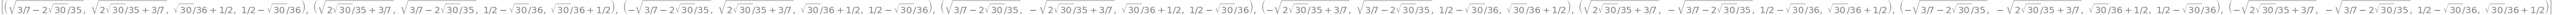

In [1]:
import sympy as sp
sp.init_printing(use_latex=True)
x, x1, x2, x3, x4 = sp.symbols('x x1 x2 x3 x4')
a0, a1, a2, a3, a4, a5, a6, a7 = sp.symbols('a0 a1 a2 a3 a4 a5 a6 a7')
w1, w2, w3, w4 = sp.symbols('w1 w2 w3 w4')
f = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7
I1 = sp.integrate(f, (x, -1, 1)).subs({x3:-x1,x4:-x2,w3:w1,w4:w2})
I2 = (w1*(f.subs(x, x1)) + w2*(f.subs(x, x2)) + w3*(f.subs(x, x3)) +  w4*(f.subs(x, x4))).subs({x3:-x1,x4:-x2,w3:w1,w4:w2})
display("I1: ",I1)
display("I2: ",I2)
Eq1 = sp.expand(I1 - I2).coeff(a0)
Eq2 = sp.expand(I1 - I2).coeff(a1)
Eq3 = sp.expand(I1 - I2).coeff(a2)
Eq4 = sp.expand(I1 - I2).coeff(a3)
Eq5 = sp.expand(I1 - I2).coeff(a4)
Eq6 = sp.expand(I1 - I2).coeff(a5)
Eq7 = sp.expand(I1 - I2).coeff(a6)
Eq8 = sp.expand(I1 - I2).coeff(a7)
display("Eq1: ",Eq1)
display("Eq2: ",Eq2)
display("Eq3: ",Eq3)
display("Eq4: ",Eq4)
display("Eq5: ",Eq5)
display("Eq6: ",Eq6)
display("Eq7: ",Eq7)
display("Eq8: ",Eq8)
sol = list(sp.nonlinsolve([Eq1, Eq3, Eq5, Eq7], [x1, x2, w1, w2]))
display(sol)